In [1]:
from clickfeatures import regularity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats

%matplotlib inline

### 1. Create a random timestamps and a regular timestamps

In [10]:
# some indicators measure periodity based on weeks, so, unit_per_period must be a multiply of 7
unit_per_period = 7
num_periods = 10
size = unit_per_period * num_periods
ts_random = np.random.normal(scale=0.5, size=size)
ts_regular = np.array([math.sin(i * 2. * math.pi / unit_per_period) for i in range(size)])

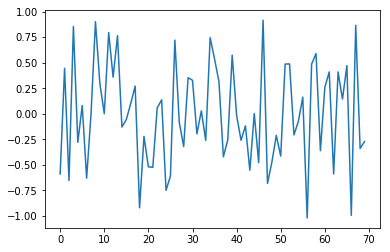

In [11]:
plt.plot(range(size), ts_random)

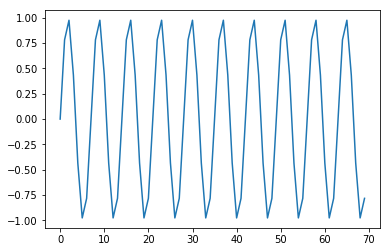

In [12]:
plt.plot(range(size), ts_regular)

### 2. Calculate Regularity

timestamps is a list of times that an event of interest happens.

For example, if a student studies every Monday for a month, the timestamps should be represented as :
`[0, 7, 14, 21]`

In [13]:
def timeseries_to_timestamps(ts, threshold=0.5):
    r"""
        create a list of timestamp from a list of timeseries
        Argument:
            ts (iterable): a timeseries, where index is timestamp
            threshold (numeric): a threshold, when abs(v) > threshold, the event happens
        Return:
            timestamps (list): a list of timestamp
    """
    
    return [i for i, v in zip(range(len(ts)), ts) if abs(v) > threshold]

In [14]:
ts_random = timeseries_to_timestamps(ts_random)
ts_regular = timeseries_to_timestamps(ts_regular)

In [15]:
reg1 = regularity.TimeRegularity(ts=ts_random, unit='day')
reg2 = regularity.TimeRegularity(ts=ts_regular, unit='day')

In [16]:
reg1.get_regularity()

{'fwd': 3.7019053279034857,
 'pwd': 0.8029302732504906,
 'ws1': 0.2537037037037037,
 'ws2': 0.4217105752395769,
 'ws3': 0.20703703703703707}

In [17]:
reg2.get_regularity()

{'fwd': 8.01937735804838,
 'pwd': 8.07354922057604,
 'ws1': 1.0,
 'ws2': 1.0,
 'ws3': 1.0}

the unit of time is day. So, only **intra-week** indicatrs are available.  

all indicators are quite different between `ts_random` and `ts_regular`.  

Note that 
1. `ws1-3` measures the intra-week activity similarity (-1 to 1). As it is entirely the same everyweek `ts_regular`, they are all 1s.
2. `pwd` is negatively correlated to the entropy of user activity. So more regular activity will have higher `pwd` 
3. `fwd` is freqency based measure, using **Fourier transform** ans set frequency to 1/7. So, stronger week patterns will have strong `fwd`. 

In the authors [original paper](https://link.springer.com/chapter/10.1007/978-3-319-45153-4_21), `ws2` have the strongest correlation with students final score (`ws1-3` are all highly correlated). Followed by `fwd`.